In [1]:
import pandas as pd

# Especifica la ruta del archivo CSV
file_path = 'D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv'

# Cargar el CSV en un DataFrame
df_mora_prestamos = pd.read_csv(file_path)

In [2]:
import pandas as pd

# Supongamos que df_mora_prestamos es tu DataFrame
# Si no has cargado el DataFrame, puedes hacerlo de la siguiente manera:
# df_mora_prestamos = pd.read_csv('tu_archivo.csv')

# Contar la cantidad de registros y variables
num_registros = df_mora_prestamos.shape[0]  # Número de filas
num_variables = df_mora_prestamos.shape[1]  # Número de columnas

# Imprimir los resultados
print(f"Cantidad de registros: {num_registros}")
print(f"Cantidad de variables: {num_variables}")

Cantidad de registros: 1626264
Cantidad de variables: 32


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Medidas de rendimiento para Sin Balanceo:
ROC-AUC: 0.9991
Precision: 0.9778
Recall: 0.9514
F1-Score: 0.9644
Accuracy: 0.9959

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9970  0.9987    0.9979  459735.0000
1                0.9778  0.9514    0.9644   28145.0000
accuracy         0.9959  0.9959    0.9959       0.9959
macro avg        0.9874  0.9750    0.9811  487880.0000
weighted avg     0.9959  0.9959    0.9959  487880.0000


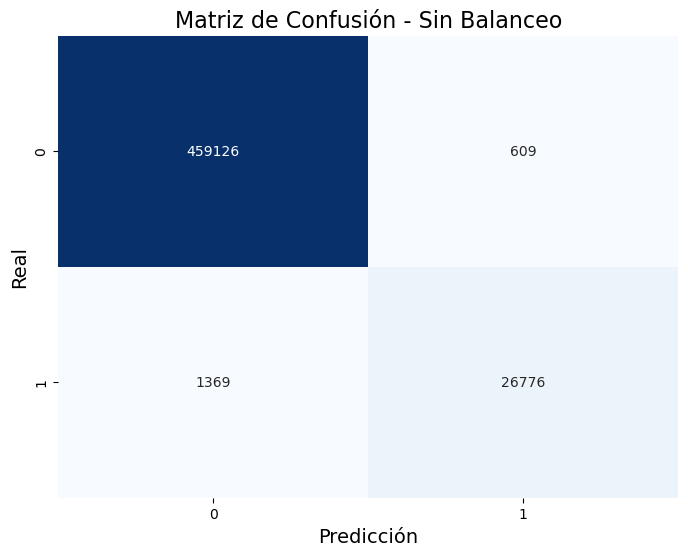

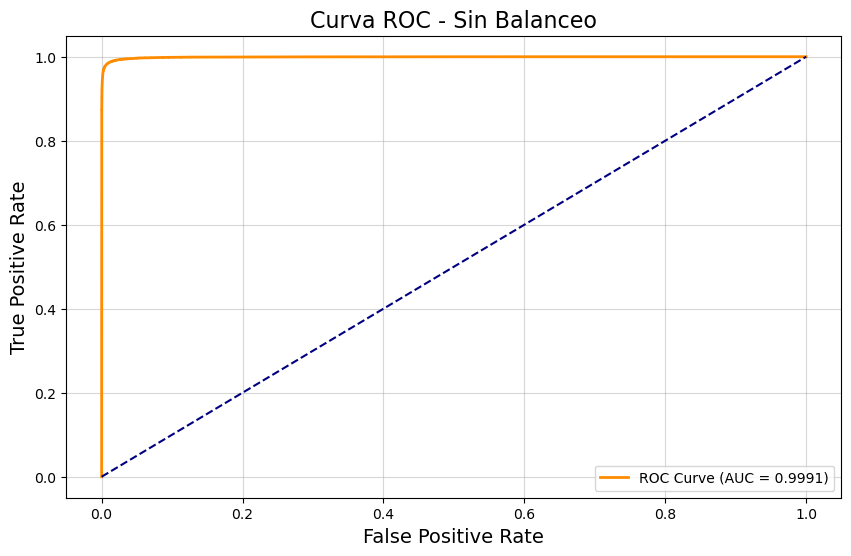

C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Medidas de rendimiento para SMOTE:
ROC-AUC: 0.9989
Precision: 0.8917
Recall: 0.9758
F1-Score: 0.9318
Accuracy: 0.9918

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9985  0.9927    0.9956  459735.0000
1                0.8917  0.9758    0.9318   28145.0000
accuracy         0.9918  0.9918    0.9918       0.9918
macro avg        0.9451  0.9843    0.9637  487880.0000
weighted avg     0.9923  0.9918    0.9919  487880.0000


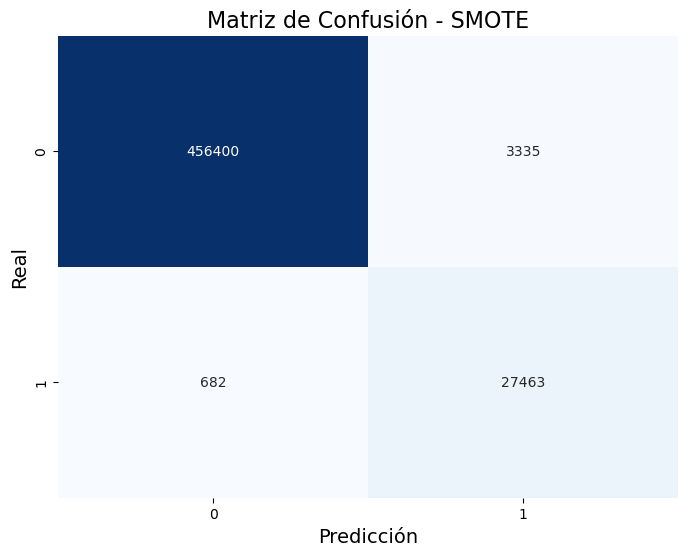

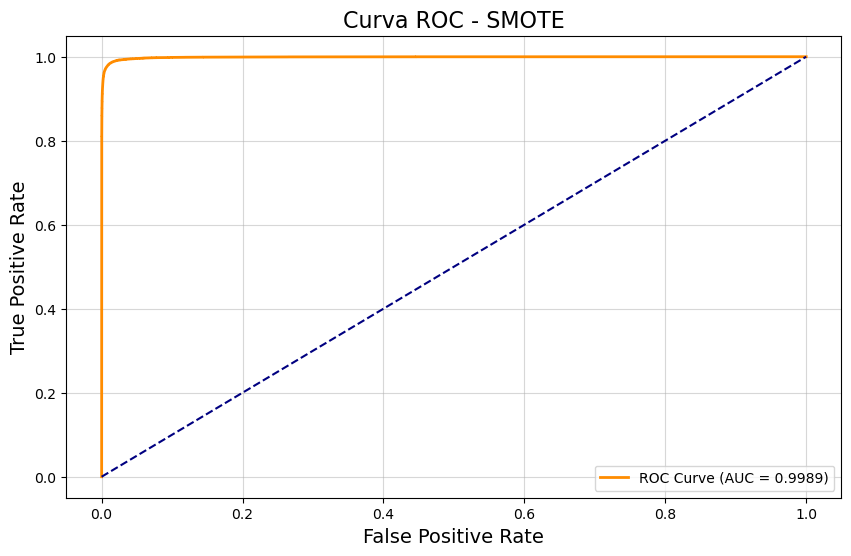

C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:15:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Medidas de rendimiento para SMOTE-Tomek:
ROC-AUC: 0.9989
Precision: 0.8969
Recall: 0.9769
F1-Score: 0.9352
Accuracy: 0.9922

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9986  0.9931    0.9958  459735.0000
1                0.8969  0.9769    0.9352   28145.0000
accuracy         0.9922  0.9922    0.9922       0.9922
macro avg        0.9477  0.9850    0.9655  487880.0000
weighted avg     0.9927  0.9922    0.9923  487880.0000


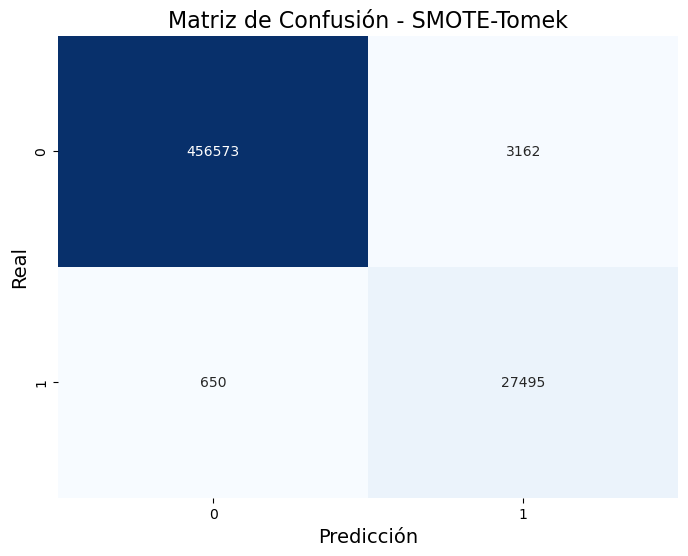

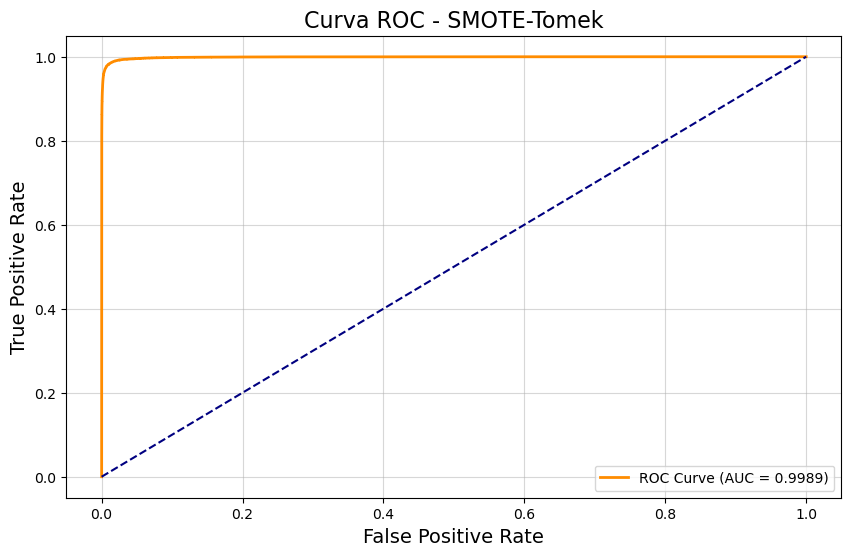


Comparativa de Técnicas de Balanceo:
               roc_auc  precision    recall        f1  accuracy
Sin Balanceo  0.999138   0.977762  0.951359  0.964380  0.995946
SMOTE         0.998860   0.891714  0.975768  0.931849  0.991766
SMOTE-Tomek   0.998869   0.896859  0.976905  0.935172  0.992187


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import (
   classification_report, 
   confusion_matrix, 
   roc_curve, 
   auc,
   f1_score, 
   accuracy_score, 
   precision_score, 
   recall_score
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Configuraciones de semilla 
np.random.seed(42)

# Cargar dataset
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.3, stratify=y, random_state=42
)

# Función para evaluar modelo
def evaluar_modelo(X_train_balanceado, y_train_balanceado, X_test, y_test, nombre_tecnica):
   # Entrenar XGBoost
   model = xgb.XGBClassifier(
       n_estimators=100,
       learning_rate=0.1,
       max_depth=3,
       min_child_weight=1,
       gamma=0,
       subsample=0.8,
       colsample_bytree=0.8,
       objective='binary:logistic',
       random_state=42,
       use_label_encoder=False,
       eval_metric='logloss'
   )
   
   model.fit(X_train_balanceado, y_train_balanceado)
   
   # Predicciones
   y_pred = model.predict(X_test)
   y_pred_proba = model.predict_proba(X_test)[:, 1]
   
   # Calcular métricas
   roc_auc = auc(*roc_curve(y_test, y_pred_proba)[:2])
   recall = recall_score(y_test, y_pred)
   precision = precision_score(y_test, y_pred)
   f1 = f1_score(y_test, y_pred)
   accuracy = accuracy_score(y_test, y_pred)
   
   print(f"\nMedidas de rendimiento para {nombre_tecnica}:")
   print(f"ROC-AUC: {roc_auc:.4f}")
   print(f"Precision: {precision:.4f}")
   print(f"Recall: {recall:.4f}")
   print(f"F1-Score: {f1:.4f}")
   print(f"Accuracy: {accuracy:.4f}")
   
   # Reporte de Clasificación
   print("\nReporte de Clasificación:")
   reporte = classification_report(y_test, y_pred, output_dict=True)
   reporte_redondeado = pd.DataFrame(reporte).transpose().round(4)
   print(reporte_redondeado)
   
   # Matriz de Confusión
   cm = confusion_matrix(y_test, y_pred)
   plt.figure(figsize=(8, 6))
   sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
   plt.title(f"Matriz de Confusión - {nombre_tecnica}", fontsize=16)
   plt.xlabel("Predicción", fontsize=14)
   plt.ylabel("Real", fontsize=14)
   plt.show()
   
   # Curva ROC
   fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
   plt.figure(figsize=(10, 6))
   plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="darkorange", lw=2)
   plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
   plt.xlabel("False Positive Rate", fontsize=14)
   plt.ylabel("True Positive Rate", fontsize=14)
   plt.title(f"Curva ROC - {nombre_tecnica}", fontsize=16)
   plt.legend(loc="lower right")
   plt.grid(alpha=0.5)
   plt.show()
   
   return {
       'roc_auc': roc_auc,
       'precision': precision,
       'recall': recall,
       'f1': f1,
       'accuracy': accuracy
   }

# 1. Sin balanceo
resultados_sin_balanceo = evaluar_modelo(X_train, y_train, X_test, y_test, 'Sin Balanceo')

# 2. Con SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
resultados_smote = evaluar_modelo(X_train_smote, y_train_smote, X_test, y_test, 'SMOTE')

# 3. Con SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
resultados_smote_tomek = evaluar_modelo(X_train_smote_tomek, y_train_smote_tomek, X_test, y_test, 'SMOTE-Tomek')

# Comparativa de resultados
comparativa = pd.DataFrame([
   resultados_sin_balanceo,
   resultados_smote,
   resultados_smote_tomek
], index=['Sin Balanceo', 'SMOTE', 'SMOTE-Tomek'])

print("\nComparativa de Técnicas de Balanceo:")
print(comparativa)

# Guardar resultados
comparativa.to_csv('resultados_xgboost.csv')
styled_df = comparativa.style.format('{:.4f}')
styled_df.to_html('resultados_xgboost.html')

MEJORES HIPERPARARAMETROS

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Cargar dataset
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Definir el espacio de búsqueda de hiperparámetros
param_distributions = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Configurar el modelo base
model = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Realizar la búsqueda
print("Iniciando búsqueda de hiperparámetros...")
random_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y score
print("\nMejores parámetros encontrados:")
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nMejor score (ROC-AUC): {random_search.best_score_:.4f}")

# Entrenar el modelo con los mejores parámetros
best_model = xgb.XGBClassifier(**random_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular métricas
print("\nMétricas en conjunto de prueba:")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Guardar los mejores parámetros
pd.DataFrame([random_search.best_params_]).to_csv('mejores_parametros_xgboost.csv', index=False)

Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:54:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Mejores parámetros encontrados:
subsample: 0.8
reg_lambda: 0
reg_alpha: 1.0
n_estimators: 700
min_child_weight: 3
max_depth: 10
learning_rate: 0.1
gamma: 0.4
colsample_bytree: 0.7

Mejor score (ROC-AUC): 0.9998

Métricas en conjunto de prueba:
ROC-AUC: 0.9998
Precision: 0.9911
Recall: 0.9770
F1-Score: 0.9840
Accuracy: 0.9982


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Cargar dataset
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Mejores hiperparámetros encontrados
best_params = {
    'subsample': 0.8,
    'reg_lambda': 0,
    'reg_alpha': 1.0,
    'n_estimators': 700,
    'min_child_weight': 3,
    'max_depth': 10,
    'learning_rate': 0.1,
    'gamma': 0.4,
    'colsample_bytree': 0.7,
    'objective': 'binary:logistic',
    'random_state': 42,
    'use_label_encoder': False
}

# Preparar KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar resultados
train_scores = []
val_scores = []

print(f"Iniciando validación cruzada con {n_splits} folds...")

# Realizar validación cruzada
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\nFold {fold}/{n_splits}")
    
    # Dividir datos
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Crear y entrenar modelo
    model = xgb.XGBClassifier(**best_params)
    model.fit(X_train, y_train)
    
    # Predicciones
    train_pred = model.predict(X_train)
    train_pred_proba = model.predict_proba(X_train)[:, 1]
    
    val_pred = model.predict(X_val)
    val_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Calcular métricas
    train_metrics = {
        'roc_auc': roc_auc_score(y_train, train_pred_proba),
        'precision': precision_score(y_train, train_pred),
        'recall': recall_score(y_train, train_pred),
        'f1': f1_score(y_train, train_pred),
        'accuracy': accuracy_score(y_train, train_pred)
    }
    
    val_metrics = {
        'roc_auc': roc_auc_score(y_val, val_pred_proba),
        'precision': precision_score(y_val, val_pred),
        'recall': recall_score(y_val, val_pred),
        'f1': f1_score(y_val, val_pred),
        'accuracy': accuracy_score(y_val, val_pred)
    }
    
    train_scores.append(train_metrics)
    val_scores.append(val_metrics)
    
    print("\nMétricas de entrenamiento:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    print("\nMétricas de validación:")
    for metric, value in val_metrics.items():
        print(f"{metric}: {value:.4f}")

# Calcular promedios y desviaciones estándar
train_means = pd.DataFrame(train_scores).mean()
train_stds = pd.DataFrame(train_scores).std()
val_means = pd.DataFrame(val_scores).mean()
val_stds = pd.DataFrame(val_scores).std()

# Crear DataFrame para el resumen
summary_data = {
    'Train Mean': train_means,
    'Train Std': train_stds,
    'Val Mean': val_means,
    'Val Std': val_stds,
    'Diff (Train-Val)': train_means - val_means
}

summary_df = pd.DataFrame(summary_data).round(4)

print("\nResumen de validación cruzada:")
print(summary_df)

# Guardar resultados
summary_df.to_csv('xgboost_cross_validation_results.csv')

# Evaluar overfitting
print("\nEvaluación de overfitting:")
for metric in train_means.index:
    diff = train_means[metric] - val_means[metric]
    print(f"\n{metric}:")
    print(f"Diferencia Train-Val: {abs(diff):.4f}")
    if abs(diff) > 0.02:
        print("⚠️ Posible overfitting detectado")
    else:
        print("✓ No hay evidencia de overfitting")

Iniciando validación cruzada con 5 folds...

Fold 1/5


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:01:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Métricas de entrenamiento:
roc_auc: 1.0000
precision: 0.9998
recall: 0.9989
f1: 0.9993
accuracy: 0.9999

Métricas de validación:
roc_auc: 0.9999
precision: 0.9916
recall: 0.9801
f1: 0.9858
accuracy: 0.9984

Fold 2/5


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:02:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Métricas de entrenamiento:
roc_auc: 1.0000
precision: 0.9997
recall: 0.9989
f1: 0.9993
accuracy: 0.9999

Métricas de validación:
roc_auc: 0.9997
precision: 0.9912
recall: 0.9768
f1: 0.9839
accuracy: 0.9982

Fold 3/5


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:03:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Métricas de entrenamiento:
roc_auc: 1.0000
precision: 0.9998
recall: 0.9989
f1: 0.9993
accuracy: 0.9999

Métricas de validación:
roc_auc: 0.9998
precision: 0.9908
recall: 0.9762
f1: 0.9835
accuracy: 0.9981

Fold 4/5


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:04:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Métricas de entrenamiento:
roc_auc: 1.0000
precision: 0.9998
recall: 0.9988
f1: 0.9993
accuracy: 0.9999

Métricas de validación:
roc_auc: 0.9998
precision: 0.9910
recall: 0.9777
f1: 0.9843
accuracy: 0.9982

Fold 5/5


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:05:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Métricas de entrenamiento:
roc_auc: 1.0000
precision: 0.9998
recall: 0.9989
f1: 0.9993
accuracy: 0.9999

Métricas de validación:
roc_auc: 0.9998
precision: 0.9913
recall: 0.9781
f1: 0.9846
accuracy: 0.9982

Resumen de validación cruzada:
           Train Mean  Train Std  Val Mean  Val Std  Diff (Train-Val)
roc_auc        1.0000        0.0    0.9998   0.0001            0.0002
precision      0.9998        0.0    0.9912   0.0003            0.0086
recall         0.9989        0.0    0.9778   0.0015            0.0211
f1             0.9993        0.0    0.9844   0.0009            0.0149
accuracy       0.9999        0.0    0.9982   0.0001            0.0017

Evaluación de overfitting:

roc_auc:
Diferencia Train-Val: 0.0002
✓ No hay evidencia de overfitting

precision:
Diferencia Train-Val: 0.0086
✓ No hay evidencia de overfitting

recall:
Diferencia Train-Val: 0.0211
⚠️ Posible overfitting detectado

f1:
Diferencia Train-Val: 0.0149
✓ No hay evidencia de overfitting

accuracy:
Diferencia Trai

Entrenando modelo XGBoost con los mejores hiperparámetros...


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:12:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Comparación de Métricas entre Dataset Prueba (Original) y Dataset Real:
     Métrica  Dataset Prueba (Original)  Dataset Real  Desvío
0   Accuracy                     0.9982        0.9918  0.0064
1  Precision                     0.9911        0.9045  0.0866
2     Recall                     0.9770        0.9886  0.0116
3   F1-Score                     0.9840        0.9446  0.0394
4    ROC-AUC                     0.9998        0.9996  0.0002


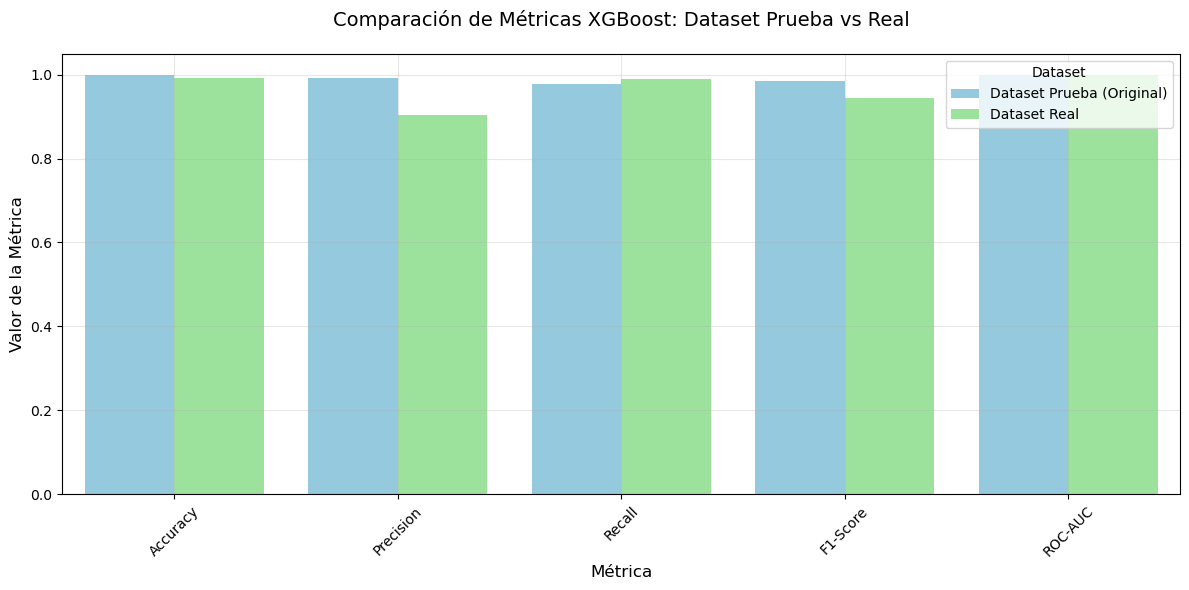

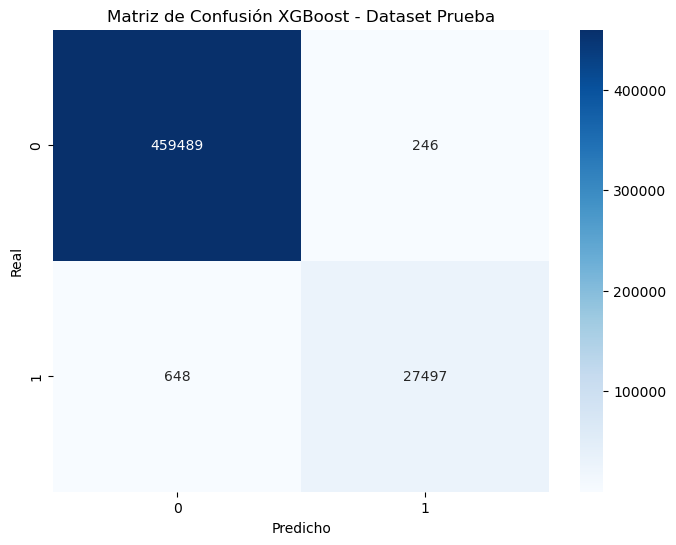

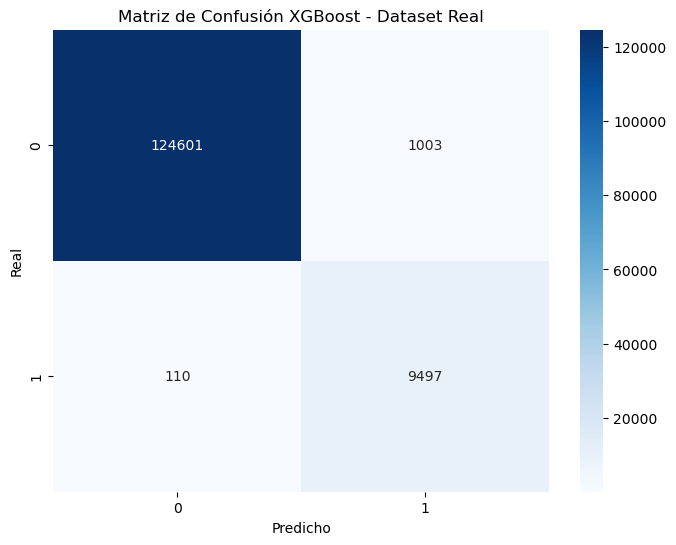


Distribución de clases en los datasets:

Dataset Original:
Morosidad
0    0.9423
1    0.0577
Name: proportion, dtype: float64

Dataset Nuevo:
Morosidad
0    0.9289
1    0.0711
Name: proportion, dtype: float64


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Función para calcular métricas
def calcular_metricas(modelo, X, y):
    y_pred = modelo.predict(X)
    y_pred_proba = modelo.predict_proba(X)[:, 1]
    
    roc_auc = roc_auc_score(y, y_pred_proba)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    
    return {
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4),
        'ROC-AUC': round(roc_auc, 4)
    }

# Cargar datasets
df_mora_prestamos_original = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')
nuevo_dataset = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales_012024.csv')

# Separar características y variable objetivo
X_original = df_mora_prestamos_original.drop('Morosidad', axis=1)
y_original = df_mora_prestamos_original['Morosidad']
X_nuevo = nuevo_dataset.drop('Morosidad', axis=1)
y_nuevo = nuevo_dataset['Morosidad']

# Asegurar nombres consistentes
X_original.columns = X_original.columns.str.replace(' ', '_')
X_nuevo.columns = X_nuevo.columns.str.replace(' ', '_')

# Dividir datos del dataset original
X_train, X_test, y_train, y_test = train_test_split(
    X_original, y_original, test_size=0.3, stratify=y_original, random_state=42
)

# Configurar modelo con los mejores hiperparámetros
best_params = {
    'subsample': 0.8,
    'reg_lambda': 0,
    'reg_alpha': 1.0,
    'n_estimators': 700,
    'min_child_weight': 3,
    'max_depth': 10,
    'learning_rate': 0.1,
    'gamma': 0.4,
    'colsample_bytree': 0.7,
    'objective': 'binary:logistic',
    'random_state': 42,
    'use_label_encoder': False
}

# Entrenar modelo
print("Entrenando modelo XGBoost con los mejores hiperparámetros...")
modelo = xgb.XGBClassifier(**best_params)
modelo.fit(X_train, y_train)

# Calcular métricas en conjunto de prueba original
metricas_test = calcular_metricas(modelo, X_test, y_test)

# Calcular métricas en nuevo dataset
metricas_nuevo = calcular_metricas(modelo, X_nuevo, y_nuevo)

# Comparar métricas
comparacion_metricas = pd.DataFrame({
    'Métrica': list(metricas_test.keys()),
    'Dataset Prueba (Original)': list(metricas_test.values()),
    'Dataset Real': list(metricas_nuevo.values()),
    'Desvío': [
        round(abs(metricas_test[m] - metricas_nuevo[m]), 4) for m in metricas_test
    ]
})

# Mostrar resultados
print("\nComparación de Métricas entre Dataset Prueba (Original) y Dataset Real:")
print(comparacion_metricas)

# Visualizar comparación
plt.figure(figsize=(12, 6))
sns.barplot(
    data=comparacion_metricas.melt(id_vars='Métrica', 
                                  value_vars=['Dataset Prueba (Original)', 'Dataset Real']),
    x='Métrica', 
    y='value', 
    hue='variable',
    palette=['skyblue', 'lightgreen']
)

plt.title("Comparación de Métricas XGBoost: Dataset Prueba vs Real", fontsize=14, pad=20)
plt.ylabel("Valor de la Métrica", fontsize=12)
plt.xlabel("Métrica", fontsize=12)
plt.legend(title="Dataset", title_fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('xgboost_metrics_comparison.png')
plt.show()

# Matriz de confusión para conjunto de prueba
cm_test = confusion_matrix(y_test, modelo.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión XGBoost - Dataset Prueba')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.savefig('xgboost_confusion_matrix_test.png')
plt.show()

# Matriz de confusión para nuevo dataset
cm_nuevo = confusion_matrix(y_nuevo, modelo.predict(X_nuevo))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nuevo, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión XGBoost - Dataset Real')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.savefig('xgboost_confusion_matrix_real.png')
plt.show()

# Guardar resultados en CSV
comparacion_metricas.to_csv('xgboost_comparison_results.csv', index=False)

# Mostrar distribución de clases en ambos datasets
print("\nDistribución de clases en los datasets:")
print("\nDataset Original:")
print(y_original.value_counts(normalize=True).round(4))
print("\nDataset Nuevo:")
print(y_nuevo.value_counts(normalize=True).round(4))

Cargando datos...
Preparando datos...
Entrenando modelo...
Realizando predicciones...


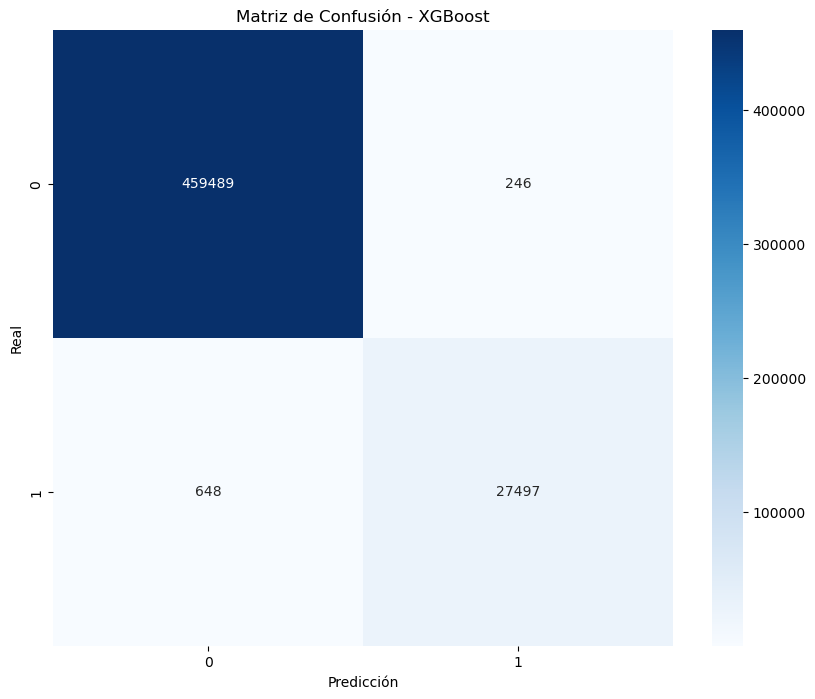


Métricas en conjunto de prueba:
ROC-AUC: 0.9998
Precision: 0.9911
Recall: 0.9770
F1-Score: 0.9840
Accuracy: 0.9982
Especificidad: 0.9995

Tiempo de ejecución: 0:01:11.238759


In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Iniciar el tiempo
start_time = datetime.now()

# Cargar dataset
print("Cargando datos...")
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir datos
print("Preparando datos...")
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.3, stratify=y, random_state=42
)

# Definir los mejores parámetros encontrados
best_params = {
   'subsample': 0.8,
   'reg_lambda': 0,
   'reg_alpha': 1.0,
   'n_estimators': 700,
   'min_child_weight': 3,
   'max_depth': 10,
   'learning_rate': 0.1,
   'gamma': 0.4,
   'colsample_bytree': 0.7,
   'objective': 'binary:logistic',
   'random_state': 42,
   'eval_metric': 'logloss'
}

# Entrenar el modelo con los mejores parámetros
print("Entrenando modelo...")
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones
print("Realizando predicciones...")
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular métricas
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
especificidad = tn / (tn + fp)

metrics = {
   'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
   'Precision': precision_score(y_test, y_pred),
   'Recall': recall_score(y_test, y_pred),
   'F1-Score': f1_score(y_test, y_pred),
   'Accuracy': accuracy_score(y_test, y_pred),
   'Especificidad': especificidad
}

# Calcular tiempo de ejecución
end_time = datetime.now()
execution_time = end_time - start_time

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

# Imprimir métricas y tiempo de ejecución
print('\nMétricas en conjunto de prueba:')
for metric, value in metrics.items():
   print(f'{metric}: {value:.4f}')

print(f'\nTiempo de ejecución: {execution_time}')

# Guardar los mejores parámetros
pd.DataFrame([best_params]).to_csv('mejores_parametros_xgboost.csv', index=False)